<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

In [ ]:
import pandas as pd
import numpy as np

# Feature Selection- Filter Methods
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from itertools import combinations

# For plots
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#! pip install jinja2


In [31]:
# Load the processed datasets
X_train = pd.read_csv("../project_data/X_train_cleaned.csv.gz",index_col=0, compression="gzip")
X_val   = pd.read_csv("../project_data/X_val_cleaned.csv.gz", index_col=0, compression="gzip")
X_test  = pd.read_csv("../project_data/X_test_cleaned.csv.gz", index_col=0, compression="gzip")

y_train = pd.read_csv("../project_data/y_train.csv.gz", compression="gzip")
y_val   = pd.read_csv("../project_data/y_val.csv.gz", compression="gzip")

In [32]:
### APAGAR ### ordinal_columns = ['Age at Injury Group'].... AQUI NÃO TEM HASDAMAGE MAS TENDO SERIA NUM PORUE VAR

bin_columns = list(X_train.columns[(X_train.nunique() == 2)].sort_values())
num_columns = list(X_train.columns[(X_train.nunique() > 2) & (~X_train.columns.isin(bin_columns))].sort_values())


print(f'Binary columns: ({len(bin_columns)})', bin_columns)
print(f'Numerical columns: ({len(num_columns)})', num_columns)

Binary columns: (778) ['Brand_AUDI', 'Brand_Aud', 'Brand_Audi', 'Brand_BM', 'Brand_BMW', 'Brand_ERCEDES', 'Brand_FOR', 'Brand_FORD', 'Brand_For', 'Brand_Ford', 'Brand_HYUNDAI', 'Brand_Hyunda', 'Brand_Hyundai', 'Brand_KODA', 'Brand_MERCEDE', 'Brand_MERCEDES', 'Brand_MW', 'Brand_Mercede', 'Brand_Mercedes', 'Brand_OPE', 'Brand_OPEL', 'Brand_ORD', 'Brand_OYOTA', 'Brand_Ope', 'Brand_Opel', 'Brand_PEL', 'Brand_SKOD', 'Brand_SKODA', 'Brand_Skod', 'Brand_Skoda', 'Brand_TOYOTA', 'Brand_Toyot', 'Brand_Toyota', 'Brand_UDI', 'Brand_V', 'Brand_VW', 'Brand_W', 'Brand_aud', 'Brand_audi', 'Brand_bmw', 'Brand_ercede', 'Brand_ercedes', 'Brand_for', 'Brand_ford', 'Brand_hyunda', 'Brand_hyundai', 'Brand_kod', 'Brand_koda', 'Brand_mercede', 'Brand_mercedes', 'Brand_mw', 'Brand_ope', 'Brand_opel', 'Brand_or', 'Brand_ord', 'Brand_oyota', 'Brand_pe', 'Brand_pel', 'Brand_skod', 'Brand_skoda', 'Brand_toyot', 'Brand_toyota', 'Brand_ud', 'Brand_udi', 'Brand_v', 'Brand_vw', 'Brand_w', 'Brand_yunda', 'Brand_yundai'

## <span style="color: #ffffff;">2.11 | Feature Selection</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

EXPLICAR COMO VAI FUNCIONAR A FEATURE SELECTION
</div>


### <span style="color: #ffffff;">2.11.1 |  Filter Methods</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.1 |  Filter Methods</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
EXPLICAR A RAZÃO DE USAR SPEARMAN E PARA QUE VARIÁVEIS <br>
DEIXAR BEM CLARO QUAIS FORAM AS TÉCNICAS USADAS TIPO PORQUÊ QUE REMOVEMOS UMA VAR E NÃO OUTRA
</div>


In [33]:
### APAGAR ### AQUI DEVO PÔR TODAS AS VARIÁVEIS? QUE VARIÁVEIS ENTRAM ONDE?
#SPEARMAN of the Numerical+Ordinal columns
# for float, int, boolean variables
X_train[num_columns].var()

engineSize        1.000016
mileage           1.000016
mpg               1.000016
paintQuality%     1.000016
previousOwners    1.000016
tax               1.000016
year              1.000016
dtype: float64

In [34]:
# Get rid of variables with variance close to zero (<= 0.001)
vart = VarianceThreshold(threshold=0.001)

#fit
X_train_sel = vart.fit(X_train)

# Get low variance columns and print them
low_variance = X_train.columns[vart.variances_ <= 0.001]

print("Features with variance ≤ 0.001:")
for col in low_variance:
    print(f"{col}: {vart.variances_[X_train.columns.get_loc(col)]:.4f}")



Features with variance ≤ 0.001:
hasDamage: 0.0000
Brand_HYUNDA: 0.0000
Brand_M: 0.0000
Brand_TOYOT: 0.0000
Brand_YUNDAI: 0.0000
Brand_bm: 0.0000
Brand_oyot: 0.0000
model_ 5 SERIE: 0.0000
model_ AGILA: 0.0000
model_ Amica: 0.0000
model_ CLA Clas: 0.0000
model_ CLC Class: 0.0000
model_ CORS: 0.0000
model_ Californi: 0.0000
model_ Camr: 0.0000
model_ Caravell: 0.0000
model_ Combo Lif: 0.0000
model_ Coroll: 0.0000
model_ G CLAS: 0.0000
model_ GL Clas: 0.0000
model_ HILU: 0.0000
model_ I4: 0.0000
model_ INSIGNI: 0.0000
model_ KONA: 0.0000
model_ M CLAS: 0.0000
model_ OCTAVI: 0.0000
model_ PASSA: 0.0000
model_ POL: 0.0000
model_ Pum: 0.0000
model_ R Class: 0.0000
model_ RS7: 0.0000
model_ S5: 0.0000
model_ SHARA: 0.0000
model_ SHUTTLE: 0.0000
model_ Transit Tourneo: 0.0000
model_ Veloster: 0.0000
model_ YARI: 0.0000
model_ YETI: 0.0000
model_ ZAFIR: 0.0000
model_ antara: 0.0000
model_ beetle: 0.0000
model_ c-h: 0.0000
model_ fiest: 0.0000
model_ fox: 0.0000
model_ fusion: 0.0000
model_ galax

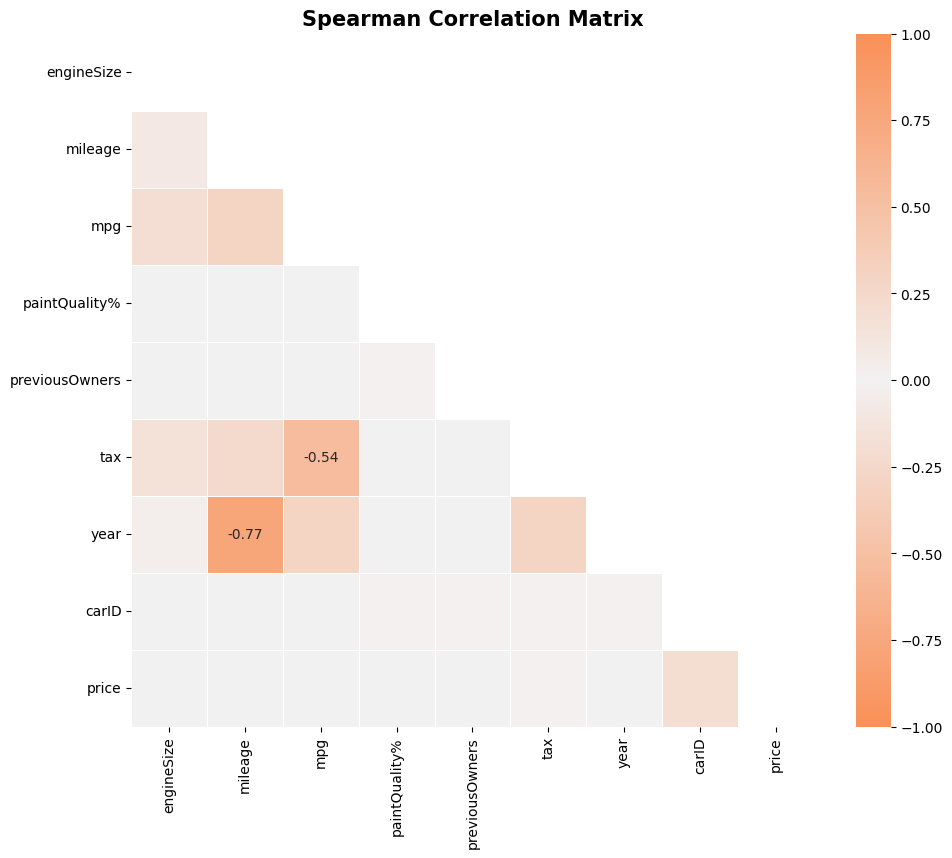

In [35]:
# Spearman Correlation for Numerical variables
cor = pd.concat([X_train[num_columns], y_train], axis=1).corr(method='spearman').round(2)                       

# Create a custom diverging colormap based on orange tones
cmap = sns.diverging_palette(h_neg=30, h_pos=30, s=90, l=70, n=256, center="light", as_cmap=True) 

# Create a Mask to hide the upper triangle (to avoid redundancy)
mask = np.zeros_like(cor, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Only show values where absolute correlation is >= 0.4
mask_annot = np.absolute(cor.values) >= 0.4
annot = np.where(mask_annot, cor.values, np.full(cor.shape, ""))


# Plotting
plt.figure(figsize=(11, 9))
sns.heatmap(
    data=cor,
    mask=mask,              # Hide the upper triangle
    cmap=cmap,              # Custom divergent color map
    annot=annot,            # Show annotations only if |value| >= 0.4
    fmt='s',                # Format annotations as strings
    vmin=-1, vmax=1, center=0, # Ensure the scale is from -1 to 1, centered at 0
    linewidths=0.5, 
)

plt.title('Spearman Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

In [36]:
def TestIndependence(X_1, X_2, vars):
    """
    Test if a variable X_1 is independent of X_2 
    (meaning there are not redundant features) using chi-square test.
    
    Parameters:
    X_1, X_2 : array-like, feature values
    vars : str, name of the features
    """
    # Build contingency table
    dfObserved = pd.crosstab(X_1, X_2)
    
    # Chi-square test
    _, p, _, _ = stats.chi2_contingency(dfObserved.values)
    
    # Interpret result
    if p < 0.05:
        result = f"The variables '{vars}' are NOT independent (they are REDUNDANT)" # Reject H0 (H0: independent)
    else:
        result = f"The variables '{vars}' are INDEPENDENT (they are NOT redundant)" # Fail to reject H0

    print(result)

In [ ]:
# apply the Chi-Square test to all pairs of binary variables
for var1, var2 in combinations(bin_columns, 2):
    TestIndependence(X_train[var1], X_train[var2], f"{var1} and {var2}")


### <span style="color: #ffffff;">2.11.2 |  Wrapper Methods</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.2 |  Wrapper Methods</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.11.3 |  Embedded Methods</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.3 |  Embedded Methods</b></span>
    </h1>
</div>

# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Optimization efforts: presentation, results and discussion
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Model definitions
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train) 
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
    
    # Print results
    print(f"{model_name} MAE: {mae:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} R²: {r2:.4f}")
    print("-" * 50)

# Print summary of all models
print("\nModel Evaluation Results Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

In [ ]:
# Sem criar nem tirar variáveis (sem feature selection), usando OHE, sem tratar inconsistências, sem tratar outliers, sem fazer hyperparameter tuning
# tratando missing values com média, usando StandardScaler
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.7321, RMSE = 4177.1965, R² = 0.8204
# Ridge: MAE = 2553.7875, RMSE = 4175.5577, R² = 0.8206
# Lasso: MAE = 2551.7477, RMSE = 4173.1808, R² = 0.8208
# RandomForest: MAE = 1482.2024, RMSE = 2499.0898, R² = 0.9357
# GradientBoosting: MAE = 2321.1029, RMSE = 3500.0157, R² = 0.8739
# DecisionTree: MAE = 1941.1537, RMSE = 3275.1219, R² = 0.8896
# KNeighbors: MAE = 2384.9863, RMSE = 4107.6665, R² = 0.8264


#--------------------------------------------------
# + tirar hasDamage e ver inconsistências em year
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.5123, RMSE = 4174.7889, R² = 0.8206
# Ridge: MAE = 2553.6070, RMSE = 4173.2138, R² = 0.8208
# Lasso: MAE = 2551.6108, RMSE = 4170.9067, R² = 0.8210
# RandomForest: MAE = 1483.6105, RMSE = 2516.0255, R² = 0.9349
# GradientBoosting: MAE = 2321.9590, RMSE = 3489.0630, R² = 0.8747
# DecisionTree: MAE = 1952.7124, RMSE = 3365.4139, R² = 0.8834
# KNeighbors: MAE = 2384.8373, RMSE = 4107.8976, R² = 0.8263
#não houve grandes alterações, em alguns modelos melhorou, noutros piorou


# --------------------------------------------------
# tratando das inconsistências das minhas variáveis + ter hasdamage
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2549.0179, RMSE = 4170.6681, R² = 0.8210
# Ridge: MAE = 2548.0386, RMSE = 4169.0990, R² = 0.8211
# Lasso: MAE = 2546.5207, RMSE = 4167.1186, R² = 0.8213
# RandomForest: MAE = 1466.3328, RMSE = 2485.5036, R² = 0.9364
# GradientBoosting: MAE = 2307.7618, RMSE = 3451.5030, R² = 0.8774
# DecisionTree: MAE = 1942.4345, RMSE = 3364.6791, R² = 0.8835
# KNeighbors: MAE = 2106.1056, RMSE = 3683.4455, R² = 0.8604
# melhorou até bastante



<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
Para muitas destas variáveis era precisa scaling da target

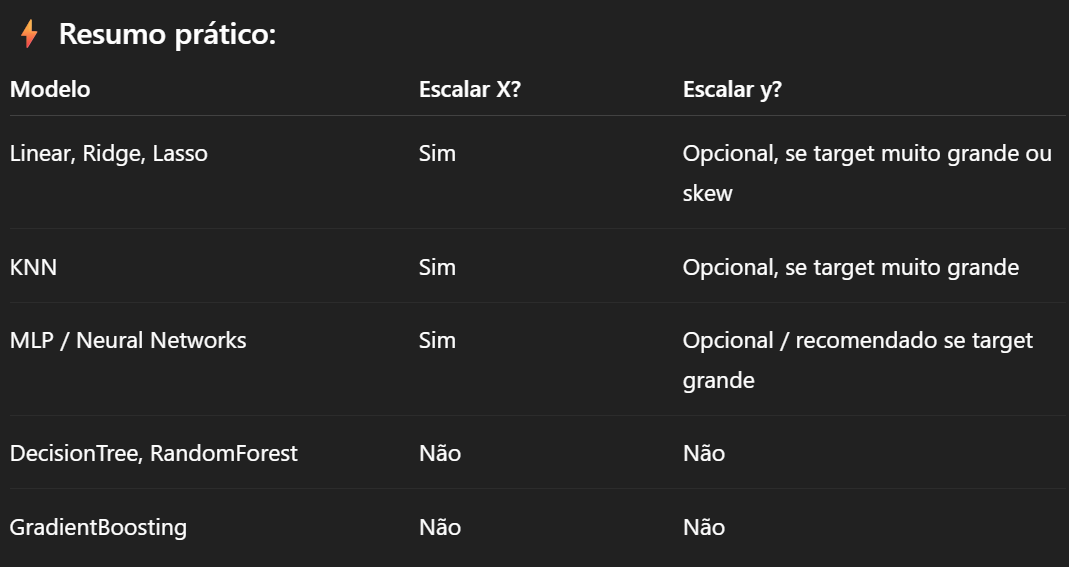

</div>
